#Importing Packages

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

#Read Dataset

In [35]:
df = pd.read_csv('/content/gdrive/MyDrive/fake_news/FakeNewsNet_DS/gossipcop_real.csv')
df = pd.DataFrame(df)
df.head()

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB


In [37]:
df.shape

(16817, 4)

In [38]:
df['label'] = 1

In [39]:
df.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,1
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,1
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,1
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,1
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,1


In [40]:
df1 = pd.read_csv('/content/gdrive/MyDrive/fake_news/FakeNewsNet_DS/gossipcop_fake.csv')
df1 = pd.DataFrame(df1)
df1.head()

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB


In [42]:
df1.shape

(5323, 4)

In [43]:
df1['label'] = 0

In [44]:
df1.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0


In [45]:
combined_df = pd.concat([df, df1], ignore_index=True)

# Analysis

In [46]:
combined_df.groupby("label").describe()

id                                   news_url         \
       count unique                   top freq    count unique   
label                                                            
0       5323   5323  gossipcop-2493749932    1     5067   4681   
1      16817  16817      gossipcop-882573    1    16804  16010   

                                                               title         \
                                                     top freq  count unique   
label                                                                         
0      www.newidea.com.au/jennifer-aniston-and-brad-p...    8   5323   4896   
1      https://www.thewrap.com/this-is-us-everything-...   11  16817  15967   

                                           tweet_ids         \
                                  top freq     count unique   
label                                                         
0      Connecting People Through News   20      5135   5047   
1                          - USweekly   12     15759  15758   

                                                               
                                                     top freq  
label                                                          
0      900336607680761857\t900407896072216576\t900412...    6  
1                 989840869443457024\t990987021194743808    2

<Axes: >

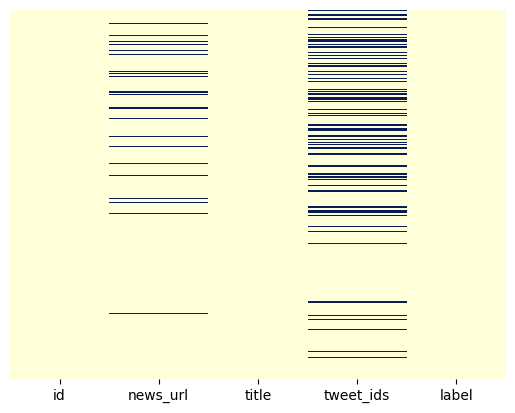

In [16]:
#IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS
import seaborn as sns
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

# Cleaning and Preprocessing

In [47]:
combined_df = combined_df.drop(['news_url', 'tweet_ids'], axis=1)

In [48]:
combined_df.head()


,id,title,label
0,gossipcop-882573,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,1
1,gossipcop-875924,Kylie Jenner refusing to discuss Tyga on Life ...,1
2,gossipcop-894416,Quinn Perkins,1
3,gossipcop-857248,I Tried Kim Kardashian's Butt Workout & Am For...,1
4,gossipcop-884684,Celine Dion donates concert proceeds to Vegas ...,1


In [49]:
combined_df['title'] = combined_df['title'].astype(str)

In [50]:
def word_count(sentence):
  return len(sentence.split())

combined_df['word count'] = combined_df['title'].apply(word_count)
combined_df.head()

,id,title,label,word count
0,gossipcop-882573,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,1,12
1,gossipcop-875924,Kylie Jenner refusing to discuss Tyga on Life ...,1,10
2,gossipcop-894416,Quinn Perkins,1,2
3,gossipcop-857248,I Tried Kim Kardashian's Butt Workout & Am For...,1,10
4,gossipcop-884684,Celine Dion donates concert proceeds to Vegas ...,1,9


In [51]:
import matplotlib.pyplot as plt
x = combined_df['word count'][combined_df.label == 1]
y = combined_df['word count'][combined_df.label == 0]
x.head()

0    12
1    10
2     2
3    10
4     9
Name: word count, dtype: int64

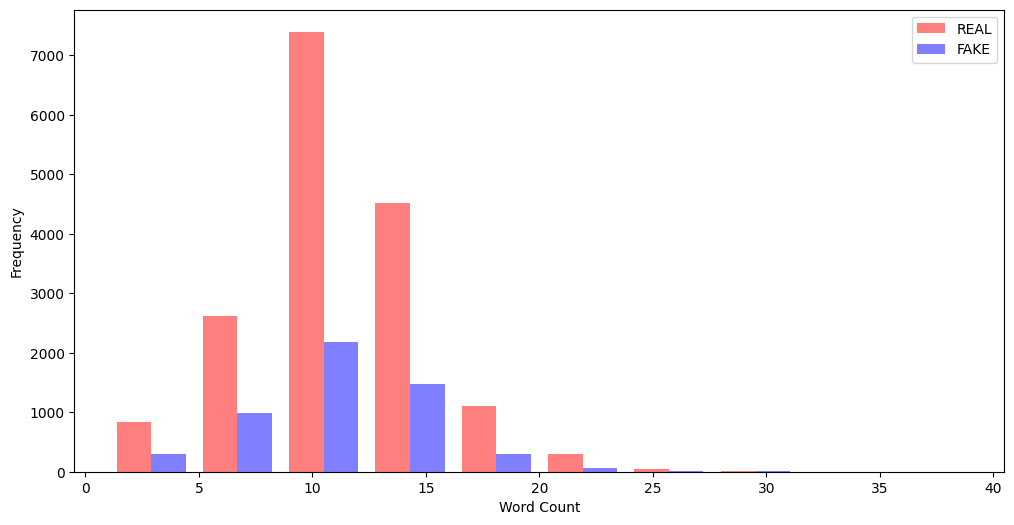

In [52]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([x, y],color = ['r','b'], alpha = 0.5,label = ['REAL','FAKE'])
plt.legend(loc = 'upper right')
plt.show()

In [53]:
#THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS ,
#LEMMATIZATION PROCESS

all_punctuations = string.punctuation + '‘’,:”][],'

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [54]:
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [55]:
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [56]:
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [57]:
combined_df['SECTION_CLEANED'] = combined_df['title'].apply(text_cleaner)
#combined_df.to_excel("output.xlsx")  # SAVE THE FINAL CLEANED COPY IF YOU WANT
combined_df.head()

,id,title,label,word count,SECTION_CLEANED
0,gossipcop-882573,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,1,12,Teen Mom Star Jenelle Evans Wedding Dress Is A...
1,gossipcop-875924,Kylie Jenner refusing to discuss Tyga on Life ...,1,10,Kylie Jenner refuse discuss Tyga Life Kylie
2,gossipcop-894416,Quinn Perkins,1,2,Quinn Perkins
3,gossipcop-857248,I Tried Kim Kardashian's Butt Workout & Am For...,1,10,I Tried Kim Kardashians Butt Workout Am Foreve...
4,gossipcop-884684,Celine Dion donates concert proceeds to Vegas ...,1,9,Celine Dion donate concert proceed Vegas shoot...


In [58]:
combined_df.to_csv("/content/gdrive/MyDrive/fake_news/gossipcop_cleaned.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT


#Read Cleaned Dataset

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fake_news/dfcleaned.csv")
df = pd.DataFrame(df)
df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
df.head()

,Unnamed: 0,text,label,word count,SECTION_CLEANED
0,0,Donald Trump just couldn t wish all Americans ...,FAKE,495,Donald Trump wish Americans Happy New Year lea...
1,1,House Intelligence Committee Chairman Devin Nu...,FAKE,305,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk...",FAKE,580,On Friday reveal former Milwaukee Sheriff Davi...
3,3,"On Christmas day, Donald Trump announced that ...",FAKE,444,On Christmas day Donald Trump announce would b...
4,4,Pope Francis used his annual Christmas Day mes...,FAKE,420,Pope Francis use annual Christmas Day message ...


In [ ]:
# Displaying the most common words in the dataset
import collections
#from counter import Counter

all_words = []

for line in list(df['SECTION_CLEANED']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('say', 152088),
 ('trump', 105270),
 ('the', 85140),
 ('us', 55153),
 ('would', 49204),
 ('i', 44434),
 ('president', 44230),
 ('state', 36220),
 ('people', 35627),
 ('make', 32290)]

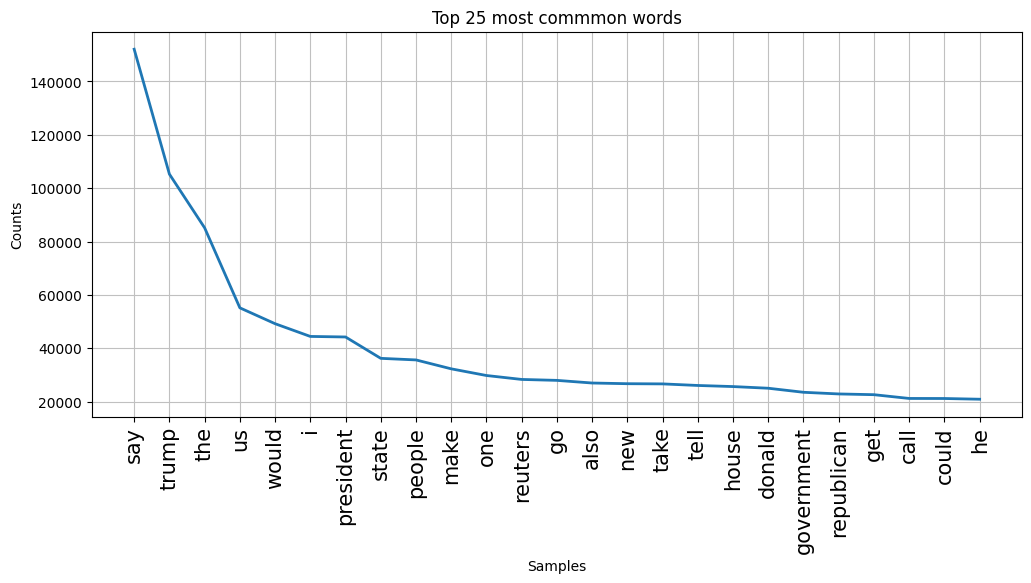

<Axes: title={'center': 'Top 25 most commmon words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


In [ ]:
!pip install WordCloud

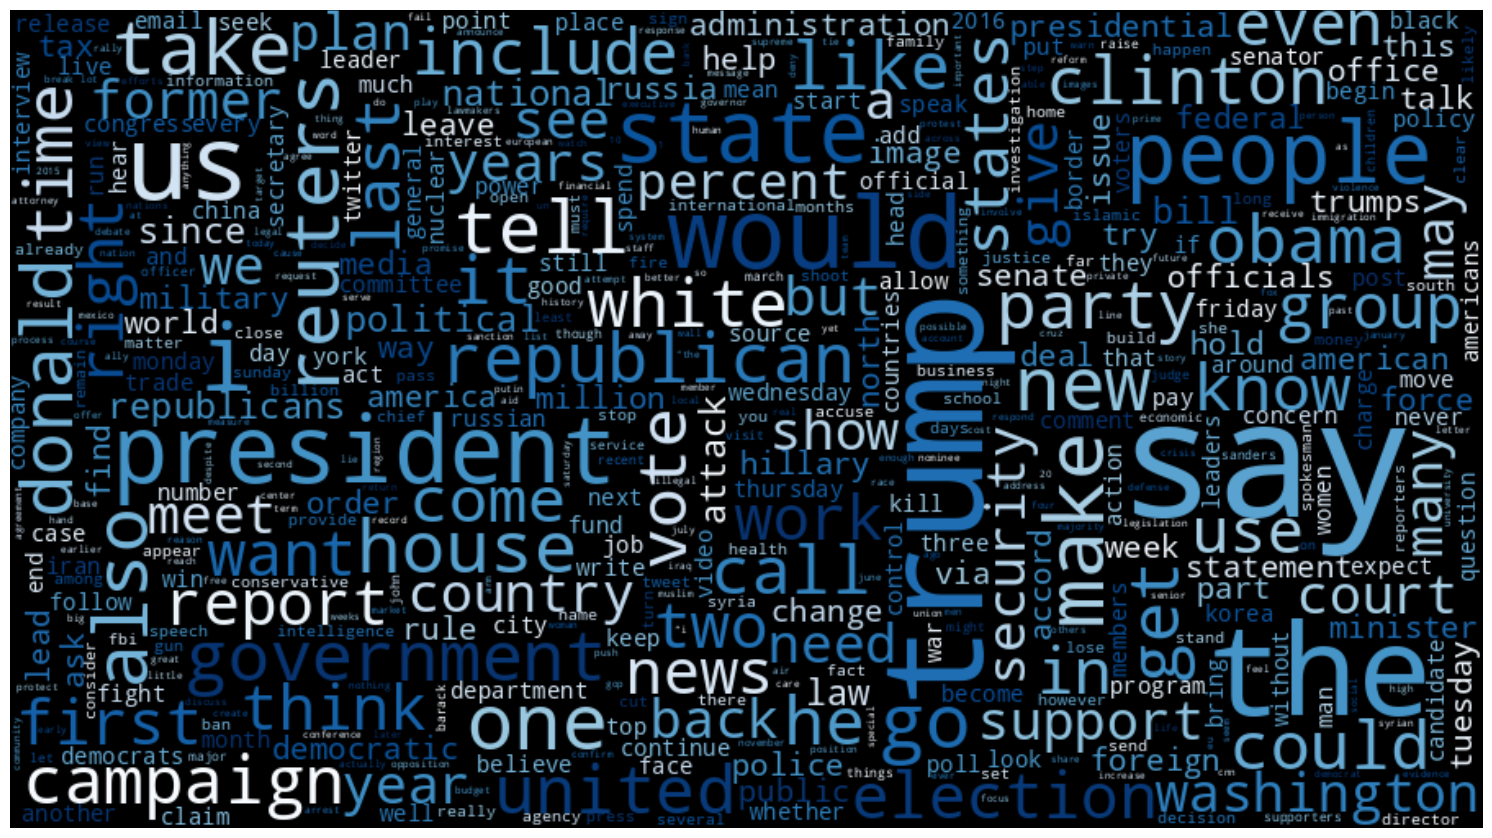

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud
import collections

all_words = []

for line in list(df['SECTION_CLEANED']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['SECTION_CLEANED'],df['label'],test_size=0.20,random_state=87)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30917,), (7730,), (30917,), (7730,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = "english")
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
count_train.shape, count_test.shape

((30917, 188823), (7730, 188823))

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_train.shape, tfidf_test.shape

((30917, 3054318), (7730, 3054318))

In [ ]:
print(tfidf_train)
#this command gives importance for each and every word
print(tfidf_train[0:3])

  (0, 3046989)	0.0670753615760886
  (0, 3046987)	0.03684384432906375
  (0, 3045384)	0.0670753615760886
  (0, 3045383)	0.0670753615760886
  (0, 3044368)	0.06434279182504683
  (0, 3044187)	0.02093681465068713
  (0, 3021469)	0.07174672041989992
  (0, 3020931)	0.03069527408053456
  (0, 2957382)	0.0670753615760886
  (0, 2956475)	0.017598559993010084
  (0, 2953563)	0.07174672041989992
  (0, 2953562)	0.07174672041989992
  (0, 2938142)	0.049534934635340644
  (0, 2937848)	0.015425839202776674
  (0, 2933321)	0.06434279182504683
  (0, 2932556)	0.027640186033195062
  (0, 2909269)	0.0670753615760886
  (0, 2909261)	0.05139103132575946
  (0, 2879927)	0.0670753615760886
  (0, 2879618)	0.06434279182504683
  (0, 2878506)	0.03171566842213366
  (0, 2866060)	0.0670753615760886
  (0, 2865931)	0.032523166417337566
  (0, 2832374)	0.0670753615760886
  (0, 2831751)	0.023659536135795706
  :	:
  (30916, 76657)	0.043072465261318915
  (30916, 72535)	0.04881701272738531
  (30916, 72525)	0.03761762479358016
  (30916,

In [ ]:
len(tfidf_vectorizer.vocabulary_) #1300819 NEARLY

3054318

# SUPPORT VECTOR MACHINES

In [ ]:
%%time

# Run this code once to get the best parameters for SVC Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

params = {
    "loss" : ["hinge", "squared_hinge"],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
}

model = LinearSVC(class_weight = 'balanced')
svc = GridSearchCV(model, param_grid=params)
svc.fit(tfidf_train, y_train)

print("BEST SCORE FROM SVC", svc.best_score_)
print("BEST PARAMETERS FOR SVC",svc.best_estimator_)

BEST SCORE FROM SVC 0.9932399148104419
BEST PARAMETERS FOR SVC LinearSVC(C=10, class_weight='balanced', loss='hinge')
CPU times: user 3min 43s, sys: 5.77 s, total: 3min 49s
Wall time: 3min 50s


In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)
print(metrics.classification_report(y_test,pred, labels=['FAKE','REAL']))


Score from TFIDF Vectorizer 99.327 %
[[3476   37]
 [  15 4202]]
              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      3513
        REAL       0.99      1.00      0.99      4217

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



In [ ]:
import pickle

with open("/content/gdrive/MyDrive/fake_news/SVC_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, SVC_classifier), fout)



#Inference

In [ ]:
with open("/content/gdrive/MyDrive/fake_news/SVC_classifier.pkl", "rb") as fin:
  vectorizer, svc_classifier = pickle.load(fin)
vectorizer, svc_classifier

(TfidfVectorizer(max_df=0.9, ngram_range=(1, 2), stop_words='english'),
 LinearSVC(C=10, class_weight='balanced', loss='hinge'))

In [ ]:
#THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS ,
#LEMMATIZATION PROCESS

all_punctuations = string.punctuation + '‘’,:”][],'

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/fake_news/dataset.xlsx')
df.shape, df.columns

((44898, 2), Index(['text', 'label'], dtype='object'))

In [ ]:
df[df['label']=='REAL']

,text,label
23481,WASHINGTON (Reuters) - The head of a conservat...,REAL
23482,WASHINGTON (Reuters) - Transgender people will...,REAL
23483,WASHINGTON (Reuters) - The special counsel inv...,REAL
23484,WASHINGTON (Reuters) - Trump campaign adviser ...,REAL
23485,SEATTLE/WASHINGTON (Reuters) - President Donal...,REAL
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,REAL
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",REAL
44895,MINSK (Reuters) - In the shadow of disused Sov...,REAL
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,REAL


In [ ]:
index = 23481
data = df.iloc[index]
x, gt = data[0], data[1]
x, gt

('WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [ ]:
x = text_cleaner(x)
x

'WASHINGTON Reuters The head conservative Republican faction US Congress vote month huge expansion national debt pay tax cut call “fiscal conservative Sunday urge budget restraint 2018 In keep sharp pivot way among Republicans US Representative Mark Meadows speak CBS “Face Nation draw hard line federal spend lawmakers brace battle January When return holiday Wednesday lawmakers begin try pass federal budget fight likely link issue immigration policy even November congressional election campaign approach Republicans seek keep control Congress President Donald Trump Republicans want big budget increase military spend Democrats also want proportional increase nondefense “discretionary spend program support education scientific research infrastructure public health environmental protection “The Trump administration already will say Were go increase nondefense discretionary spend 7 percent Meadows chairman small influential House Freedom Caucus say program “Now Democrats say thats enough ne

In [ ]:
import numpy as np
#x = vectorizer.transform(np.array([x]))
x = vectorizer.transform([x])
x

<1x3054318 sparse matrix of type '<class 'numpy.float64'>'
	with 645 stored elements in Compressed Sparse Row format>

In [ ]:
x.shape

(1, 3054318)

In [ ]:
pred = svc_classifier._predict_proba_lr(x)
pred

array([[0.18208195, 0.81791805]])

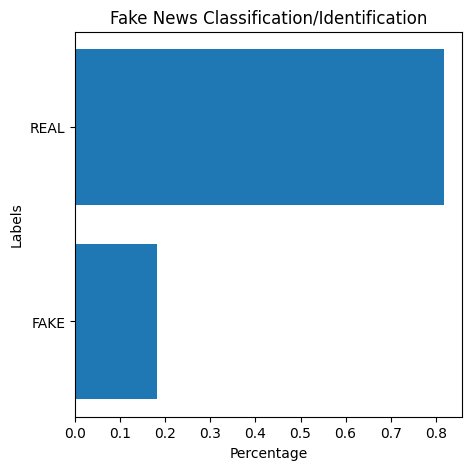

In [ ]:
plt.figure(figsize=(5, 5), )
y_pos = np.arange(len(pred[0]))
plt.barh(y_pos,pred[0])
plt.yticks(y_pos,['FAKE', 'REAL'])
plt.title('Fake News Classification/Identification')
plt.ylabel('Labels')
plt.xlabel('Percentage')
plt.show()


# BERT

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import pandas as pd

In [ ]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Assuming binary classification


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fake_news/dfcleaned.csv")
df = pd.DataFrame(df)
df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
df.head()

,Unnamed: 0,text,label,word count,SECTION_CLEANED
0,0,Donald Trump just couldn t wish all Americans ...,FAKE,495,Donald Trump wish Americans Happy New Year lea...
1,1,House Intelligence Committee Chairman Devin Nu...,FAKE,305,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk...",FAKE,580,On Friday reveal former Milwaukee Sheriff Davi...
3,3,"On Christmas day, Donald Trump announced that ...",FAKE,444,On Christmas day Donald Trump announce would b...
4,4,Pope Francis used his annual Christmas Day mes...,FAKE,420,Pope Francis use annual Christmas Day message ...


In [ ]:
df.shape

(38647, 5)

In [ ]:
x = df['SECTION_CLEANED'][df.label == 'REAL']
y = df['SECTION_CLEANED'][df.label == 'FAKE']


In [ ]:
len(x)

21192

In [ ]:
len(y)

17455

In [ ]:
texts = list(x[:350]) + list(y[:465])
texts

['WASHINGTON Reuters The head conservative Republican faction US Congress vote month huge expansion national debt pay tax cut call “fiscal conservative Sunday urge budget restraint 2018 In keep sharp pivot way among Republicans US Representative Mark Meadows speak CBS “Face Nation draw hard line federal spend lawmakers brace battle January When return holiday Wednesday lawmakers begin try pass federal budget fight likely link issue immigration policy even November congressional election campaign approach Republicans seek keep control Congress President Donald Trump Republicans want big budget increase military spend Democrats also want proportional increase nondefense “discretionary spend program support education scientific research infrastructure public health environmental protection “The Trump administration already will say Were go increase nondefense discretionary spend 7 percent Meadows chairman small influential House Freedom Caucus say program “Now Democrats say thats enough n

In [ ]:
len(texts)

815

In [ ]:
#df_labels = list(df['label'])
#df_labels[0]
#len(df_labels)

NameError: ignored

In [ ]:
#labels = [0 if label == "FAKE" else 1 for label in df_labels]

In [ ]:
labels = [1]*350 + [0]*465

In [ ]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
len(labels)

815

In [ ]:
# Tokenize and format data
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
#inputs = tokenizer(texts, padding=True, return_tensors="pt")
labels = torch.tensor(labels)

In [ ]:
# Create a DataLoader for batching
dataset = TensorDataset(inputs["input_ids"], inputs["attention_mask"], labels)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
# Fine-tune BERT
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
for epoch in range(5):  # Adjust the number of epochs
    for batch in loader:
        input_ids, attention_mask, batch_labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=batch_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
# Use the fine-tuned model for predictions
# x - 21192 , y - 17455   -> labels = [1]*3578 + [0]*4653
new_texts = list(x[3579:3581])
new_inputs = tokenizer(new_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
with torch.no_grad():
    logits = model(new_inputs["input_ids"], attention_mask=new_inputs["attention_mask"])


In [ ]:
# Get probabilities or predictions
probabilities = torch.softmax(logits.logits, dim=1)
predictions = torch.argmax(probabilities, dim=1)

In [ ]:
print("Probabilities:", probabilities)
print("Predictions:", predictions)

# Combined

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.6 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.svm import SVC
import torch
import numpy as np
import pandas as pd

In [ ]:
# Load BERT tokenizer and model  bert-base-uncased  bert-large-uncased
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
bert_model = BertModel.from_pretrained('bert-large-uncased')

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fake_news/dfcleaned.csv")
df = pd.DataFrame(df)
df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
df.head()

,Unnamed: 0,text,label,word count,SECTION_CLEANED
0,0,Donald Trump just couldn t wish all Americans ...,FAKE,495,Donald Trump wish Americans Happy New Year lea...
1,1,House Intelligence Committee Chairman Devin Nu...,FAKE,305,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk...",FAKE,580,On Friday reveal former Milwaukee Sheriff Davi...
3,3,"On Christmas day, Donald Trump announced that ...",FAKE,444,On Christmas day Donald Trump announce would b...
4,4,Pope Francis used his annual Christmas Day mes...,FAKE,420,Pope Francis use annual Christmas Day message ...


In [ ]:
x = df['SECTION_CLEANED'][df.label == 'REAL']
y = df['SECTION_CLEANED'][df.label == 'FAKE']

In [ ]:
texts = list(x[:200]) + list(y[:222])

In [ ]:
labels = [1]*200 + [0]*222

In [ ]:
data_list = [{"text": text, "label": label} for text, label in zip(texts, labels)]

In [ ]:
# Tokenize text and obtain BERT embeddings
embeddings = []
labels = []

for item in data_list:
    text = item["text"]
    label = item["label"]

    # Tokenize text and obtain embeddings
    #inputs = tokenizer(text, return_tensors="pt")
    inputs = tokenizer(text, truncation=True, padding='max_length', max_length=512, return_tensors="pt")
    with torch.no_grad():
        outputs = bert_model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    embeddings.append(embedding)
    labels.append(label)

In [ ]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(embeddings, labels)

SVC(kernel='linear')

In [ ]:
# Predict using the trained SVM model
new_text = "By now, everyone knows that disgraced National Security Adviser Michael Flynn has flipped on Donald Trump. Of course, the good folks at Saturday Night Live, who have been mocking Trump relentlessly, couldn t resist using this to needle the notoriously thin -skinned, sorry excuse for a  president.  It also helps that we are in the midst of the holiday season, which enabled SNL to use a seasonal classic, A Christmas Carol, to poke fun at Trump.Alec Baldwin took up the mantle to play Trump again, who is visited by a fictional Michael Flynn (Mikey Day) in chains, and seems positively terrified of the Ghost of Michael Flynn, who appears to tell Trump, it s time to come clean for the good of the country.  After that, the Ghosts of Christmas Past, Present, and Future line up to torture Trump in the Oval Office.The Ghost of Christmas Past is fired NBC host Billy Bush (Alex Moffat), of Trump s infamous  grab em by the pussy  tape. Then it was time for a shirtless Vladimir Putin (Beck Bennet) to arrive, to remind Trump of the fact that he wouldn t be president without help from the Russian government, and that he s about to have all of their efforts be for naught. The Ghost of Christmas Future is the best of all, with a positively wickedly delicious version of Hillary Clinton, played by Kate McKinnon, who gleefully says to Trump: You Donald, have given me the greatest Christmas gift of all! You have no idea how long I ve wanted to say this,  lock him up! Lock him up indeed. This entire criminal administration belongs in jail. It will go from Flynn, to Pence, to Trump Jr., and then to Trump himself   and then Hillary will really have the last laugh."
new_inputs = tokenizer(new_text, return_tensors="pt")
with torch.no_grad():
    new_outputs = bert_model(**new_inputs)
    new_embedding = new_outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


In [ ]:
svm_prediction = svm_model.predict([new_embedding])

In [ ]:
print("SVM Prediction:", svm_prediction)

SVM Prediction: [1]


# XLNet

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00


In [ ]:
pip install sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00


In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import XLNetTokenizer, XLNetForSequenceClassification, XLNetConfig, Trainer, TrainingArguments

In [ ]:
import pandas as pd

In [ ]:
# Load XLNet tokenizer and pre-trained model
model_name = "xlnet-base-cased"
tokenizer = XLNetTokenizer.from_pretrained(model_name)
model = XLNetForSequenceClassification.from_pretrained(model_name)

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (replace with your data loading code)
df = pd.read_csv("/content/gdrive/MyDrive/fake_news/dfcleaned.csv")
df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)



# Randomly select  % of the data
df_data = df.sample(frac=1.0, random_state=42)


# Split the dataset into training, validation, and test sets
# First, split into training and temp sets (80% training, 20% temp)
train_df, temp_df = train_test_split(df_data, test_size=0.2, random_state=42)

# Then, split the temp set into validation and test sets (50% validation, 50% test)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Now you have three DataFrames: train_df, validation_df, and test_df

# Optionally, you can reset the index of the DataFrames
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [ ]:
df.groupby("label").describe()

Unnamed: 0                                                         \
           count          mean          std      min       25%      50%   
label                                                                     
FAKE     17455.0   9226.167803  5882.230445      0.0   4363.50   8727.0   
REAL     21192.0  34182.740374  6196.027559  23481.0  28816.75  34128.5   

                         word count                                      \
            75%      max      count        mean         std  min    25%   
label                                                                     
FAKE   13464.50  22702.0    17455.0  424.420739  341.522660  0.0  277.0   
REAL   39566.25  44897.0    21192.0  384.812760  273.789538  0.0  147.0   

                             
         50%    75%     max  
label                        
FAKE   376.0  503.0  5472.0  
REAL   359.0  523.0  5172.0

In [ ]:
train_df.groupby("label").describe()

Unnamed: 0                                                         \
           count          mean          std      min       25%      50%   
label                                                                     
FAKE     13987.0   9235.019161  5890.656246      0.0   4377.00   8718.0   
REAL     16930.0  34210.190018  6202.260783  23481.0  28857.25  34148.5   

                         word count                                      \
            75%      max      count        mean         std  min    25%   
label                                                                     
FAKE   13482.50  22702.0    13987.0  424.737328  342.374954  0.0  278.0   
REAL   39599.75  44896.0    16930.0  385.424867  275.094700  0.0  145.0   

                             
         50%    75%     max  
label                        
FAKE   377.0  503.0  5472.0  
REAL   358.0  526.0  5172.0

In [ ]:
validation_df.groupby("label").describe()

Unnamed: 0                                                         \
           count          mean          std      min       25%      50%   
label                                                                     
FAKE      1708.0   9165.895199  5831.846443     21.0   4333.25   8660.0   
REAL      2157.0  34124.649513  6237.512120  23494.0  28568.00  34182.0   

                         word count                                       \
            75%      max      count        mean         std   min    25%   
label                                                                      
FAKE   13385.25  22676.0     1708.0  422.365925  351.957707   1.0  269.0   
REAL   39501.00  44897.0     2157.0  381.072323  262.247520  27.0  150.0   

                              
         50%     75%     max  
label                         
FAKE   373.0  507.25  5130.0  
REAL   359.0  521.00  1541.0

In [ ]:
test_df.groupby("label").describe()

Unnamed: 0                                                        \
           count          mean          std      min      25%      50%   
label                                                                    
FAKE      1760.0   9214.316477  5866.832318      5.0   4342.0   8904.5   
REAL      2105.0  34021.495487  6102.569517  23531.0  28695.0  33987.0   

                         word count                                        \
            75%      max      count        mean         std   min     25%   
label                                                                       
FAKE   13321.75  22696.0     1760.0  423.898864  324.203708   1.0  279.75   
REAL   39343.00  44879.0     2105.0  383.722565  274.934880  26.0  159.00   

                             
         50%    75%     max  
label                        
FAKE   373.0  496.0  4900.0  
REAL   363.0  503.0  3708.0

In [ ]:
train_df.head()

,Unnamed: 0,text,label,word count,SECTION_CLEANED
0,26752,(Reuters) - New York’s attorney general is loo...,REAL,449,Reuters New Yorks attorney general look report...
1,24981,WASHINGTON (Reuters) - U.S. Treasury Secretary...,REAL,111,WASHINGTON Reuters US Treasury Secretary Steve...
2,31641,"COLUMBUS, Ohio (Reuters) - Donald Trump’s pres...",REAL,913,COLUMBUS Ohio Reuters Donald Trumps presidenti...
3,27788,The following statements were posted to the ve...,REAL,98,The follow statements post verify Twitter acco...
4,12960,Two years before the bombings that Ahmad Khan...,FAKE,247,Two years bomb Ahmad Khan Rahami suspect carry...


In [ ]:
train_texts = list(train_df['SECTION_CLEANED'])
len(train_texts)

30917

In [ ]:
train_labels = list(train_df['label'])
len(train_labels)

30917

In [ ]:
train_labels

['REAL',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'FAKE',
 'REAL',
 'FAKE',
 'FAKE',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'FAKE',
 'REAL',
 'REAL',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'REAL',
 'FAKE',
 'REAL',
 'REAL',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 'FAKE',
 

In [ ]:
labels = [0 if label == "FAKE" else 1 for label in train_labels]
len(labels)

30917

In [ ]:
labels

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,


In [ ]:
# Tokenize and format data
tokenized_data = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
#tokenized_data = tokenizer(train_texts, padding=True, truncation=False, return_tensors="pt")
labels = torch.tensor(labels)

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./TrainingArgs/XLNet",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, tokenized_data, labels):
        self.input_ids = tokenized_data["input_ids"]
        self.attention_mask = tokenized_data["attention_mask"]
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx],
        }

train_dataset = CustomDataset(tokenized_data, labels)


<ipython-input-21-1ac74a72af6a>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels)


In [ ]:
# Trainer for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset  # Replace with your tokenized dataset
    #data_collator=data_collator,      # Define data collator if needed
)

In [ ]:
# Fine-tune the model
trainer.train()

Step,Training Loss
500,0.122200
1000,0.043100
1500,0.026300
2000,0.036400
2500,0.027400
3000,0.034300
3500,0.025400
4000,0.427500
4500,0.701800
5000,0.696100


TrainOutput(global_step=11595, training_loss=0.2271223572577997, metrics={'train_runtime': 5917.7115, 'train_samples_per_second': 15.673, 'train_steps_per_second': 1.959, 'total_flos': 2.642293080872755e+16, 'train_loss': 0.2271223572577997, 'epoch': 3.0})

In [ ]:
# Save the model if needed
trainer.save_model("/content/gdrive/MyDrive/fake_news/Models/XLNet")

In [ ]:
validation_df.groupby("label").describe()

Unnamed: 0                                                         \
           count          mean          std      min       25%      50%   
label                                                                     
FAKE      1708.0   9165.895199  5831.846443     21.0   4333.25   8660.0   
REAL      2157.0  34124.649513  6237.512120  23494.0  28568.00  34182.0   

                         word count                                       \
            75%      max      count        mean         std   min    25%   
label                                                                      
FAKE   13385.25  22676.0     1708.0  422.365925  351.957707   1.0  269.0   
REAL   39501.00  44897.0     2157.0  381.072323  262.247520  27.0  150.0   

                              
         50%     75%     max  
label                         
FAKE   373.0  507.25  5130.0  
REAL   359.0  521.00  1541.0

In [ ]:
val_texts = list(validation_df['SECTION_CLEANED'])
len(val_texts)

3865

In [ ]:
val_labels_org = list(validation_df['label'])
len(val_labels_org)

3865

In [ ]:
val_labels = [0 if label == "FAKE" else 1 for label in val_labels_org]
len(val_labels)


3865

In [ ]:
# Assuming you have text_samples_val (list of validation text samples) and labels_val (list of corresponding labels)

# Tokenize validation data
tokenized_data_val = tokenizer(
    val_texts,
    padding=True,
    truncation=True,
    return_tensors="pt",
    max_length=512,  # Adjust as needed based on your dataset and model's capacity
)



In [ ]:
# Create a PyTorch dataset for validation
from torch.utils.data import Dataset

class CustomValidationDataset(Dataset):
    def __init__(self, tokenized_data, labels):
        self.input_ids = tokenized_data["input_ids"]
        self.attention_mask = tokenized_data["attention_mask"]
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx],
        }

validation_dataset = CustomValidationDataset(tokenized_data_val, val_labels)


In [ ]:
# Evaluate the model on a validation set (replace with your own validation set)
results = trainer.evaluate(validation_dataset)

In [ ]:
results

{'eval_loss': 0.0024178260937333107,
 'eval_runtime': 130.5712,
 'eval_samples_per_second': 29.601,
 'eval_steps_per_second': 3.707,
 'epoch': 3.0}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the model for inference
loaded_model = XLNetForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/fake_news/fake_news_classifier_xlnet_full")


In [ ]:
test_texts = list(test_df['SECTION_CLEANED'])
len(test_texts)

3865

In [ ]:
test_labels_org = list(test_df['label'])
len(test_labels_org)

3865

In [ ]:
test_labels = [0 if label == "FAKE" else 1 for label in test_labels_org]
len(test_labels)

3865

In [ ]:
# Tokenize new text for prediction
test_inputs = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
labels_test = torch.tensor(test_labels)

In [ ]:
# Make predictions on the test dataset
with torch.no_grad():
    outputs = loaded_model(**test_inputs)
    logits = outputs.logits
    predicted_labels = torch.argmax(logits, dim=1)

In [ ]:
labels_test

tensor([1, 0, 1,  ..., 0, 1, 0])

In [ ]:
predicted_labels

tensor([1, 0, 1,  ..., 0, 1, 0])

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(labels_test.tolist(), predicted_labels.tolist())
precision = precision_score(labels_test.tolist(), predicted_labels.tolist())
recall = recall_score(labels_test.tolist(), predicted_labels.tolist())
f1 = f1_score(labels_test.tolist(), predicted_labels.tolist())
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 99.87%
Precision: 99.95%
Recall: 99.81%
F1 Score: 99.88%
